In [1]:
%matplotlib inline


# Solving Laplace's equation in 2d

This example shows how to solve a 2d Laplace equation with spatially varying
boundary conditions.


In [20]:
# Librerias
import numpy as np
from pde import CartesianGrid, solve_laplace_equation

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.gridspec as gridspec

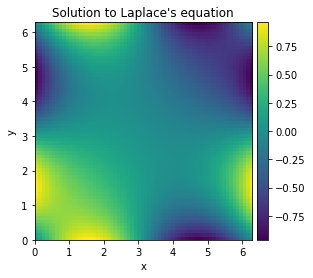

In [24]:
# EJEMPLO 1
grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
#help(grid)
bcs = [{"value": "sin(y)"}, {"value": "sin(x)"}]
res = solve_laplace_equation(grid, bcs)
res.plot()

In [3]:
#help(solve_laplace_equation)

In [115]:
# EJEMPLO 2
Lx = 10
Ly = 150
Nx = 100
Ny = Ly/Lx*Nx
print(Ny)

#grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
grid = CartesianGrid([[-Lx/2, Lx/2],[0, Ly]], [Nx, Ny])
print(grid)

1500.0
CartesianGrid(bounds=((-5.0, 5.0), (0.0, 150.0)), shape=(100, 1500), periodic=[False, False])


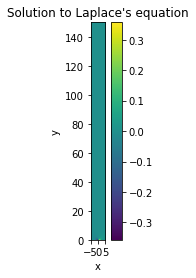

In [116]:
# set boundary conditions `bc` for all axes
bc_x_left = {"derivative": 0}
bc_x_right = {"derivative": 0}
bc_x = [bc_x_left, bc_x_right]
bc_y_up = {"value": 0}
bc_y_down = {"value": "1*sin(x)*exp(-x*x)"}
bc_y = [bc_y_down, bc_y_up]
bcs=[bc_x, bc_y]

#bcs = [{"value":0}, {"value":1}]

#print(bcs)
res = solve_laplace_equation(grid, bcs)
res.plot()
#help(res)

In [117]:
# Hay dos formas de calcular el gradiente:
res_x_grad = np.gradient(res.data, Lx/Nx, axis=0, edge_order=1)
res_y_grad = np.gradient(res.data, Ly/Ny, axis=1, edge_order=1)

# o
#resgrad = np.gradient(res.data)
#res_x_grad = resgrad[0]
#res_y_grad = resgrad[1]

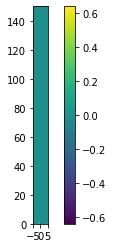

In [118]:
# Hay que trasponer la matriz:
rango=(-Lx/2,Lx/2,0,Ly)
plt.imshow(res_y_grad.T, cmap='viridis', extent=rango,origin='lower')
plt.colorbar()

(100,)


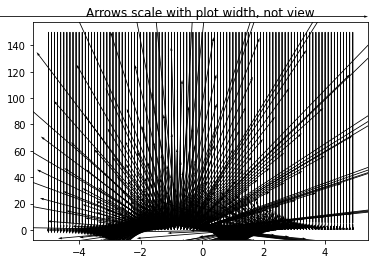

In [119]:
# Campo vectorial: 
fig1, ax1 = plt.subplots()
ax1.set_title('Arrows scale with plot width, not view')

XX = np.arange(-Lx/2, Lx/2, Lx/Nx)
print(XX.shape)
YY = np.arange(0, Ly, Ly/Ny)

Q = ax1.quiver(XX, YY, res_x_grad.T, res_y_grad.T, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

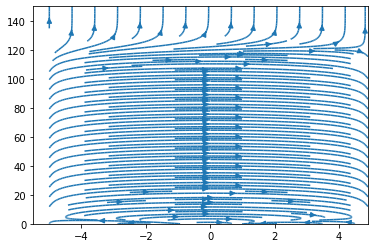

In [120]:
#  Varying density along a streamline
plt.streamplot(XX, YY, res_x_grad.T, res_y_grad.T, density=[0.5, 3])
#plt.streamplot(XX, YY[2500:5000], res_x_grad.T[2500:5000,:], res_y_grad.T[2500:5000,:], density=[0.5, 3])
#help(plt.streamplot)